In [1]:
import pandas as pd
import numpy  as np 
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

### Importando base de dados

In [2]:
df = pd.read_excel('data.xls',header = 1 )
df.columns = df.columns.str.lower()

### Visão do banco de dados

In [3]:
df.head(5)

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Padronizando nome das colunas para letra minuscula

In [4]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

### Corrigindo nome das colunas Pay_i, i = 0, 2, ...6

In [5]:
df.rename(columns = {'pay_0':'pay_1'},inplace = True)

### Verificand dados faltantes

In [6]:
df.isnull().sum().to_frame('Missing').sort_values('Missing',ascending = False).head()

,Missing
id,0
bill_amt2,0
pay_amt6,0
pay_amt5,0
pay_amt4,0


### Alterando nome das categorias de algumas features

###### Coluna sexo

In [7]:
df['sex_name'] = df['sex'].apply(lambda x: 'M' if x == 1 else 'F')
df.drop('sex', inplace = True , axis = 1)

###### Coluna escolaridade

In [8]:
df.education.\
value_counts(normalize = True).\
to_frame().\
reset_index().\
rename(columns = {'index':'nivel'}).sort_values('nivel')

,nivel,education
6,0,0.000467
1,1,0.352833
0,2,0.467667
2,3,0.163900
4,4,0.004100
3,5,0.009333
5,6,0.001700


In [9]:
df.loc[df['education'] == 1,'education_name'] = 'graduate_school'
df.loc[df['education'] == 2,'education_name'] = 'university'
df.loc[df['education'] == 3,'education_name'] = 'high_school'
df.loc[df['education'] >= 4,'education_name'] = 'others'
df.loc[df['education'] == 0,'education_name'] = 'others'
df.drop('education',axis = 1 , inplace = True)

In [10]:
df['education_name'].unique()

array(['university', 'graduate_school', 'high_school', 'others'],
      dtype=object)

###### Estado Civil

In [11]:
df.marriage.value_counts(normalize = True).to_frame()

,marriage
2,0.532133
1,0.455300
3,0.010767
0,0.001800


In [12]:
#X4: Marital status (1 = married; 2 = single; 3 = others).
df.loc[df['marriage'] == 1 , 'marriage_name'] = 'married'
df.loc[df['marriage'] == 2 , 'marriage_name'] = 'single'
df.loc[df['marriage'] == 3 , 'marriage_name'] = 'others'
df.drop('marriage' , axis = 1 , inplace = True)

##### Coluna target

In [13]:
# Convertendo colunas default_payment_next_month
df['target']   = df['default_payment_next_month'].apply(lambda x: 'GOOD' if x == 0 else 'BAD')
df.rename(columns = {'default_payment_next_month':'num_target'} , inplace = True)

### Droping ID column

In [14]:
df.drop('id',axis = 1, inplace = True)

### Análise Exploratória

In [15]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


### Função para criar gráfico com distribuição de cada categoria

In [16]:
def create_cat_count(i):        
    ax = plt.figure(figsize = (18,6))

    plt.subplot(1,2,1)
    ax = df[i].value_counts().sort_values().plot(kind = 'bar')
    plt.title(i + '  - Quantidade')
    plt.ylim(0,)

    plt.subplot(1,2,2)
    ax = df[i].value_counts(normalize = True).sort_values().plot(kind = 'bar')
    plt.title(i +  ' -  % ')
    
    plt.show()

### Função para criar gráfico com distribuição de cada categoria pela variável target

In [17]:
def create_cat_by_target(i):     
    color_level = {'GOOD':'steelblue','BAD':'tomato'}

    plt.figure(figsize = (18,6))
    plt.subplot(1,2,1)
    ax = sns.barplot(data = df.groupby(i)['target'].value_counts().sort_values().to_frame('total').reset_index(),
                         x = i,y = 'total',hue = 'target',palette=color_level)
    plt.title(i + ' - Quantidade')
    ax = add_value_labels(ax)
    ax = plt.legend(title = '')
    
    plt.legend(loc='upper right',title = 'Target')
    plt.subplot(1,2,2)
    ax = sns.barplot(data = df.groupby(i)['target'].value_counts(normalize = True).to_frame('pct').reset_index(),
                x = i,y = 'pct',hue = 'target',palette=color_level)      
    plt.title(i + ' - %')
    ax = add_value_labels(ax)
    ax = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    
    plt.show()
    
    

##### Distribuição da variável target

Text(0.5, 1.0, '%')

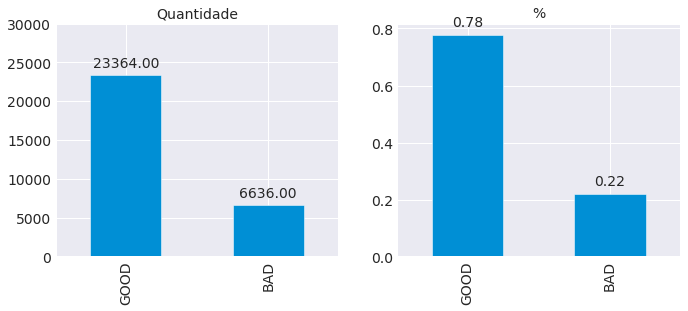

In [18]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
ax = df['target'].value_counts().plot(kind = 'bar')
ax = add_value_labels(ax)
plt.title('Quantidade',fontsize = 14)
plt.ylim(0,30000)

plt.subplot(1,2,2)
ax = df['target'].value_counts(normalize = True).plot(kind = 'bar')
ax = add_value_labels(ax)
plt.title('%',fontsize = 14)



### Distribuição das variáveis categóricas

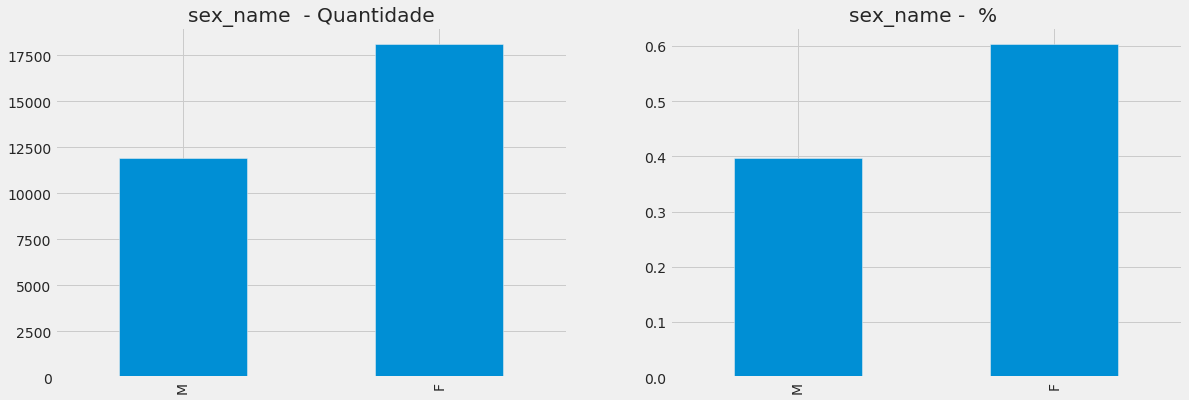

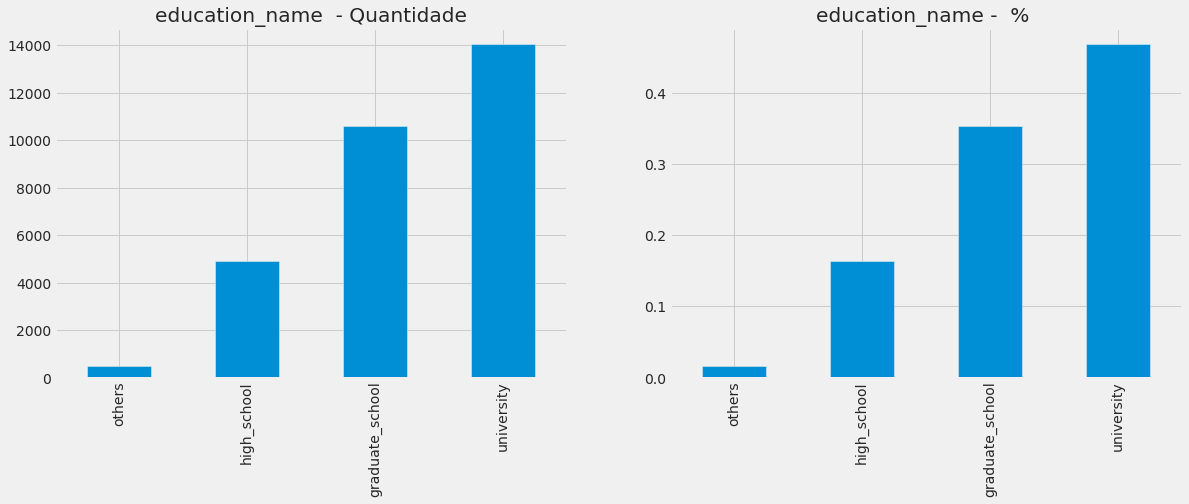

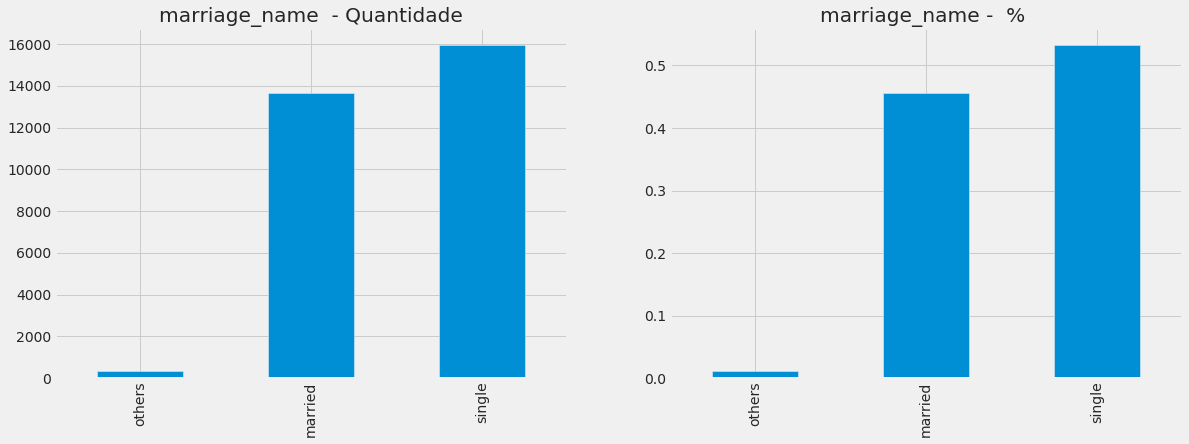

In [19]:
plt.style.use('fivethirtyeight')
for i in df.drop('target',axis = 1).select_dtypes('object').columns:
    create_cat_count(i)

### Distribuição das Variáveis categóricas de acordo a variável target

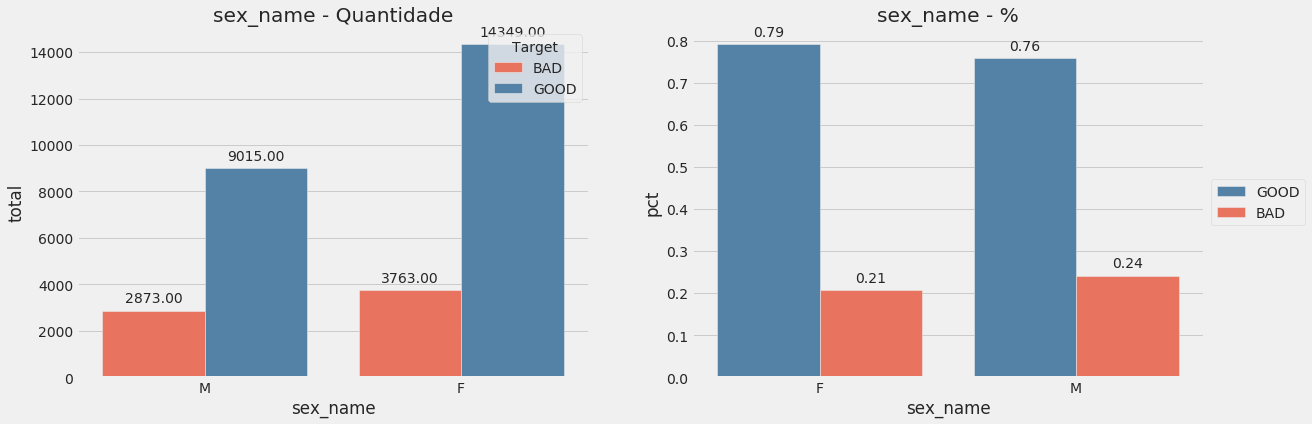

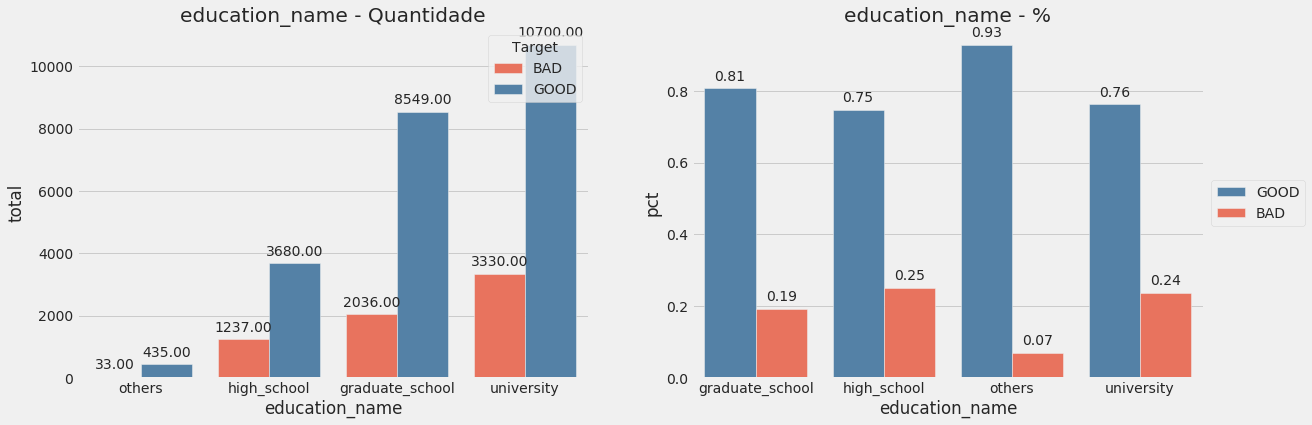

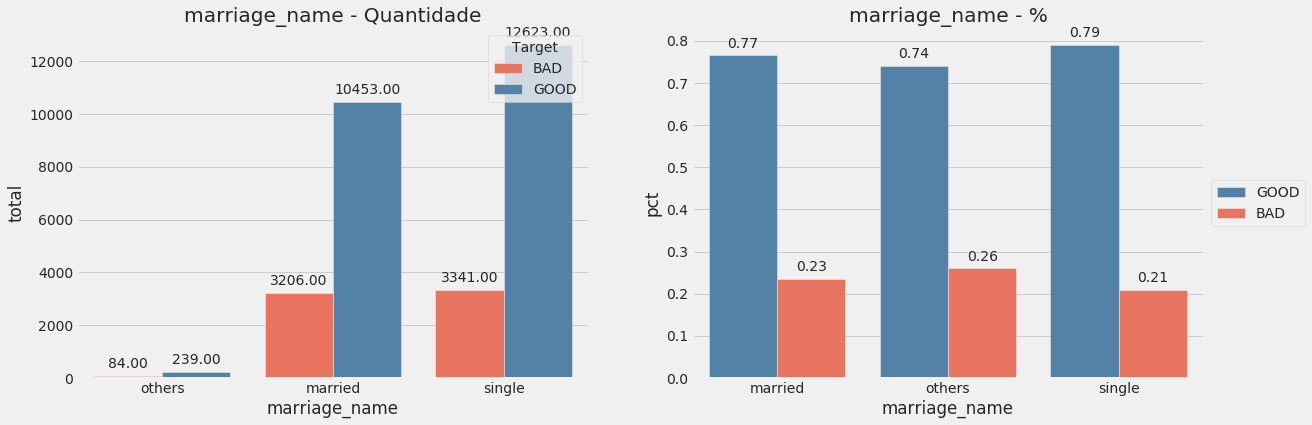

In [20]:
for i in df.select_dtypes('object').drop(['target'],axis =1).columns:
        create_cat_by_target(i)

### Teste de Hipótese para independencia

In [21]:
from scipy.stats import chi2_contingency
Pvalue  = []
feature = []
for i in df.drop('target',axis = 1).select_dtypes('object'):
    a = pd.crosstab(df[i],df['target'])
    chi2, p, dof, ex = chi2_contingency(a)
    Pvalue.append(p)
    feature.append(i)

round(pd.DataFrame({'Variável':feature,'P-valor':Pvalue}),34)

,Variável,P-valor
0,sex_name,4.944679e-12
1,education_name,1.000000e-34
2,marriage_name,2.448048e-07


### BoxPlot das variáveis continuas pelas variáveis categóricas

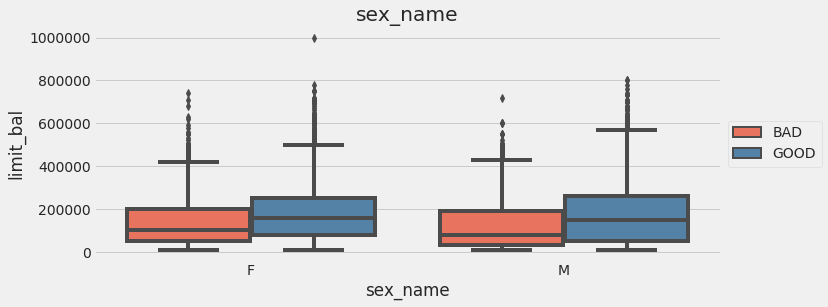

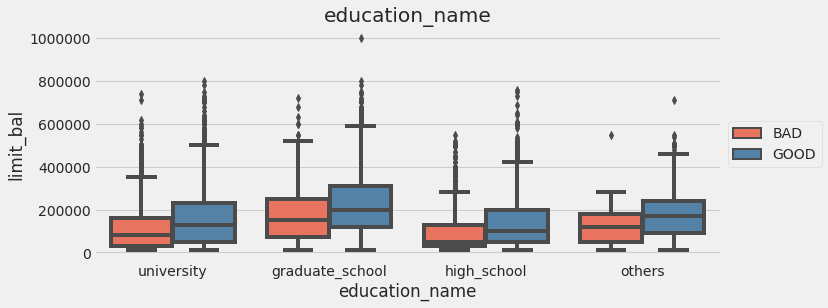

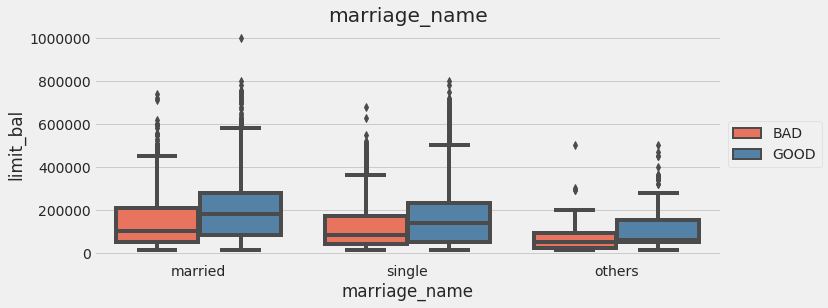

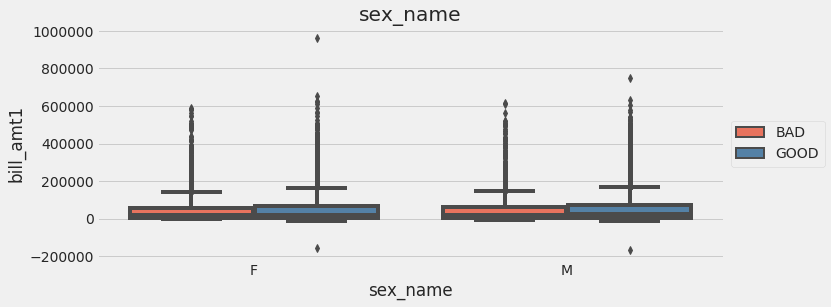

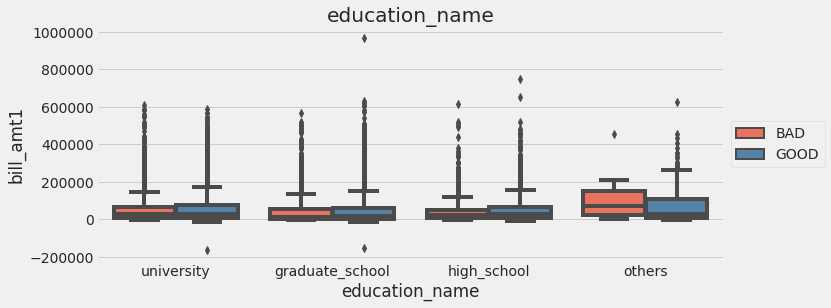

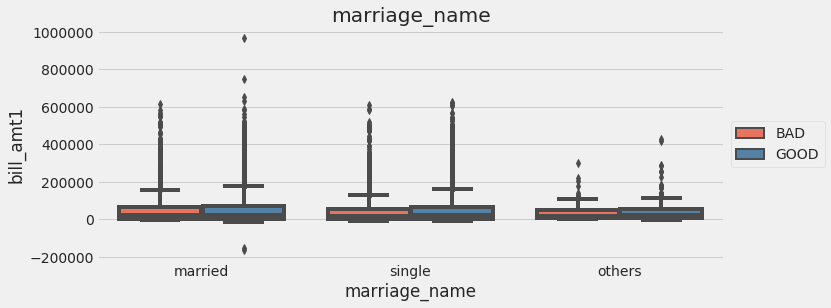

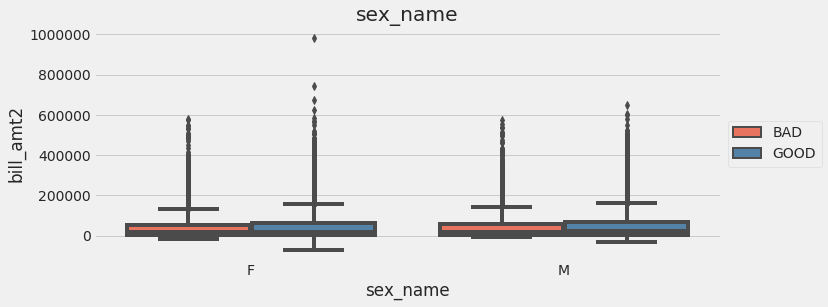

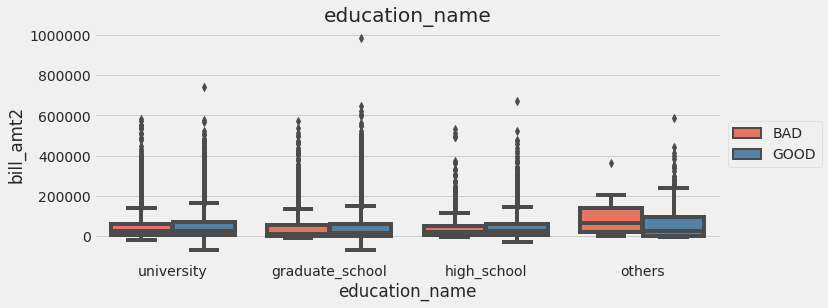

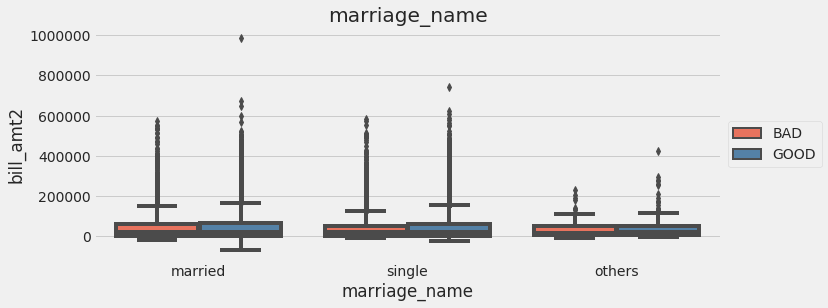

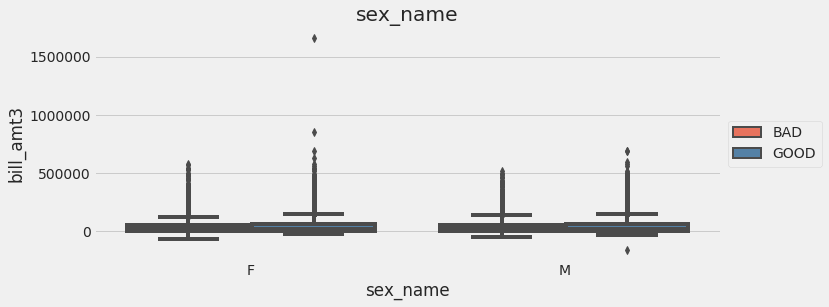

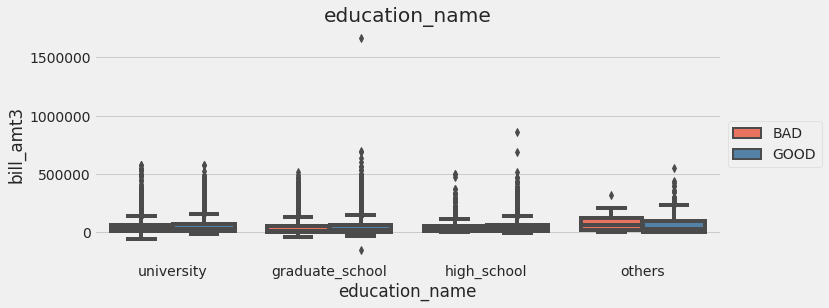

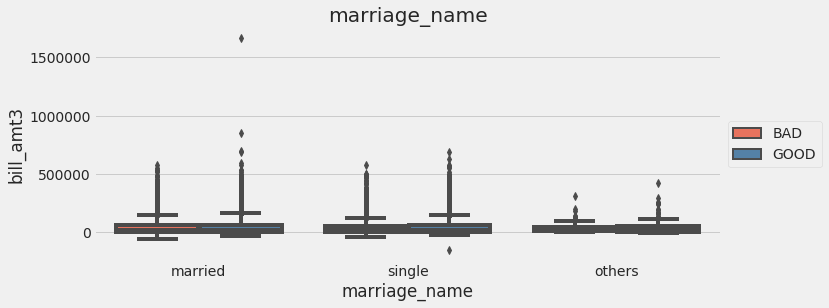

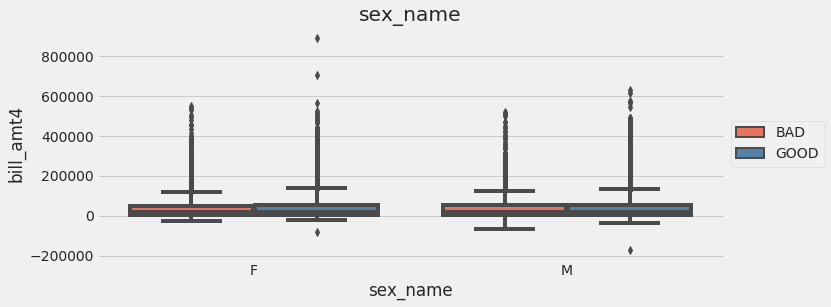

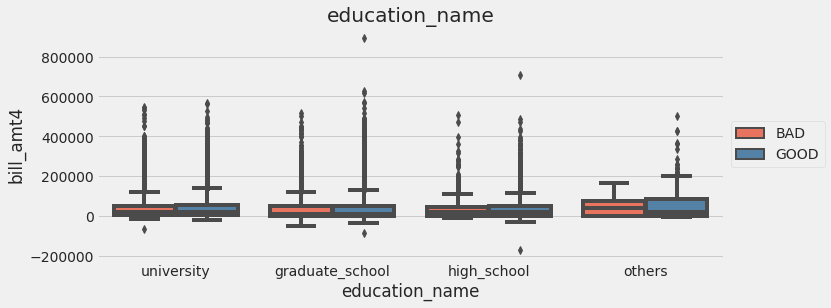

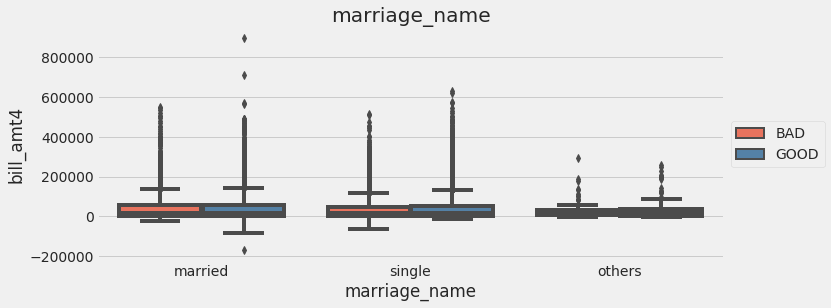

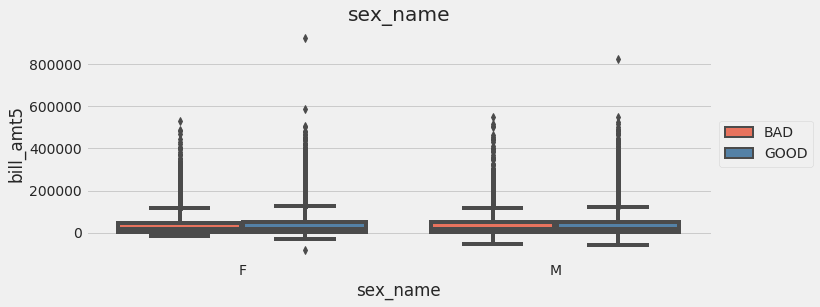

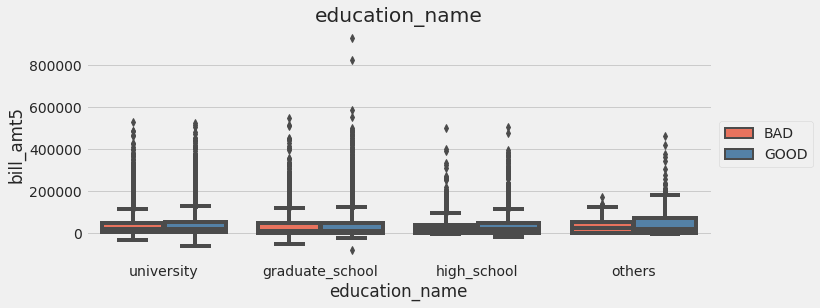

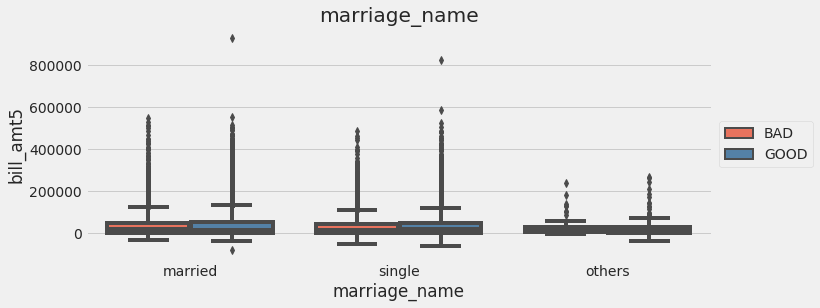

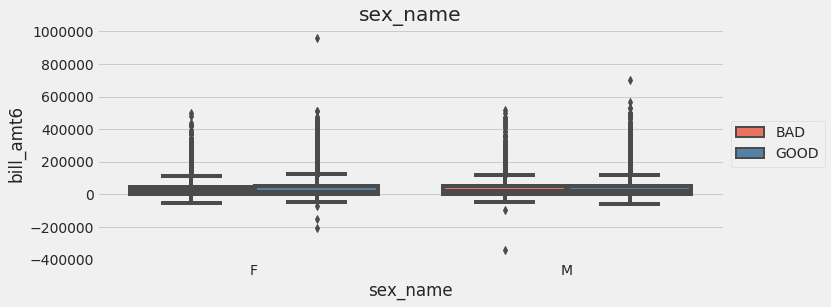

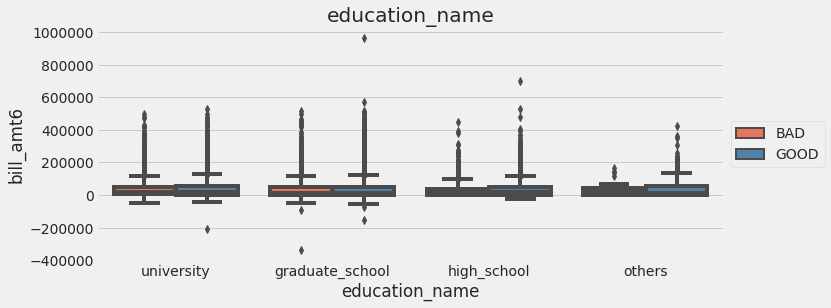

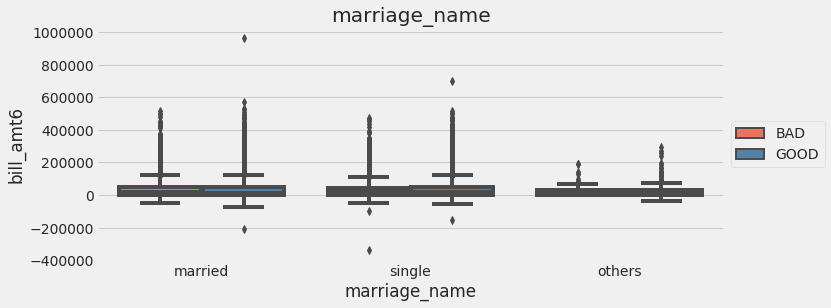

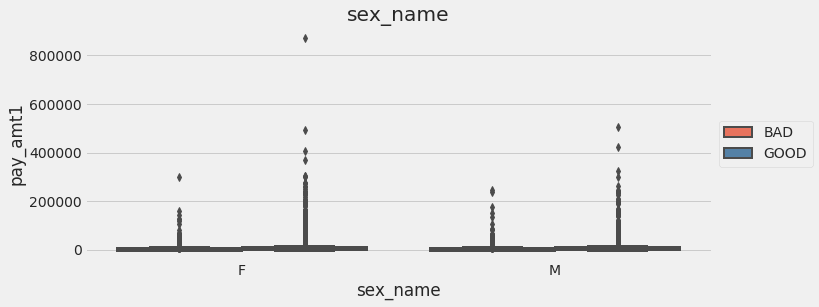

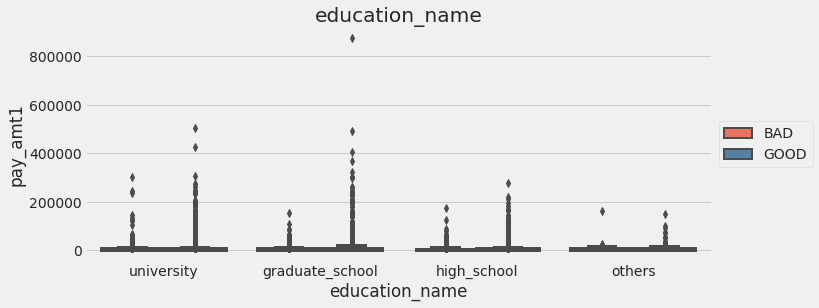

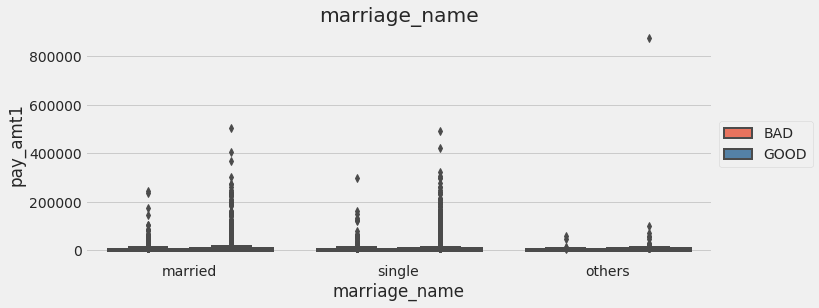

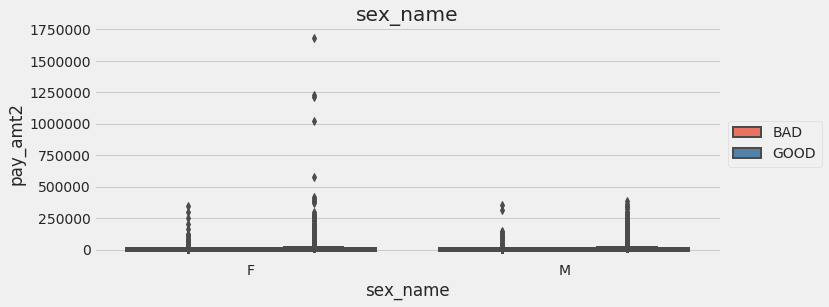

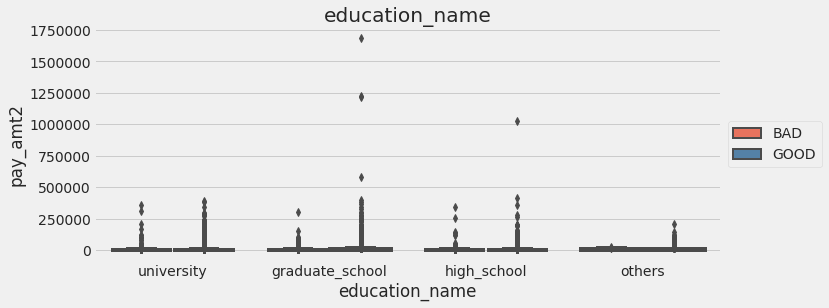

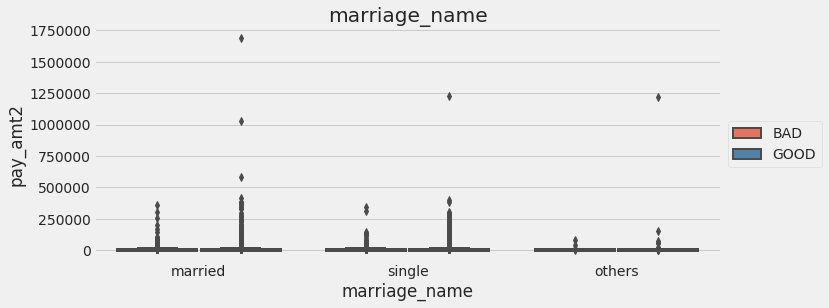

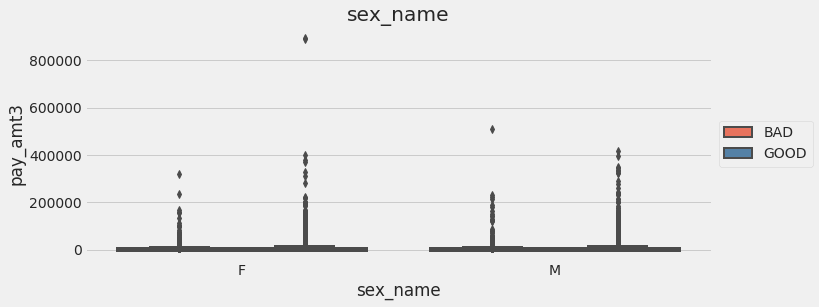

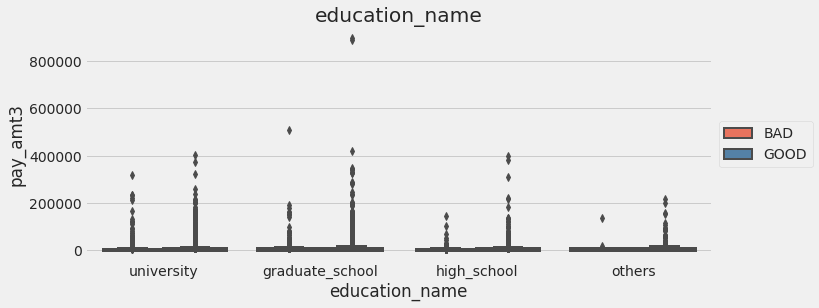

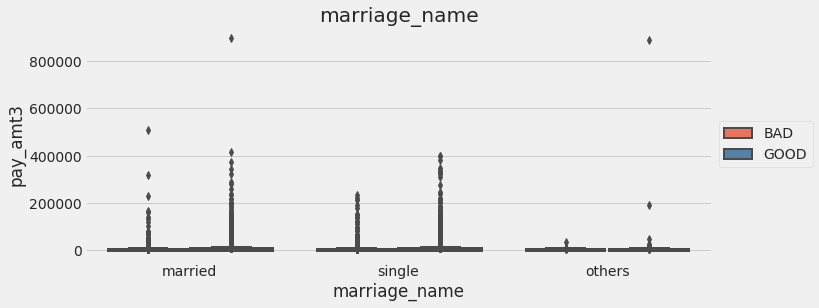

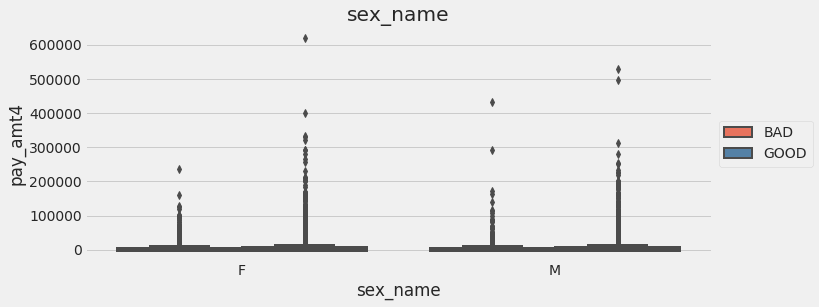

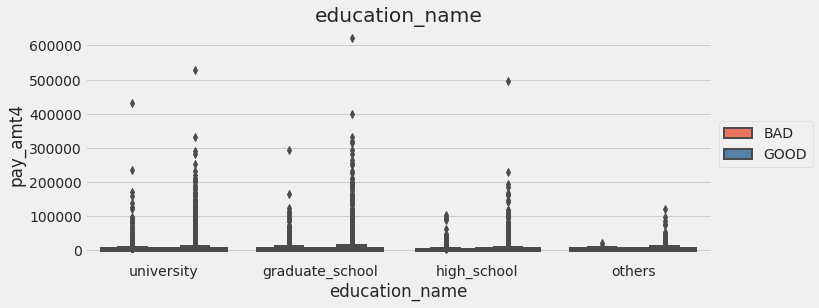

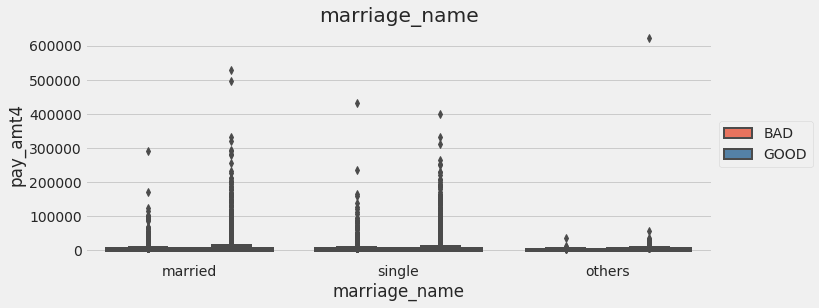

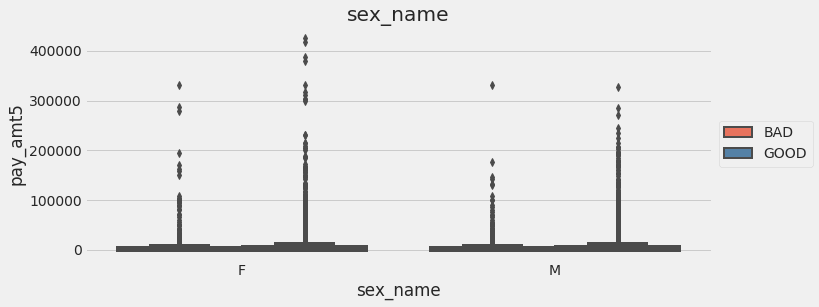

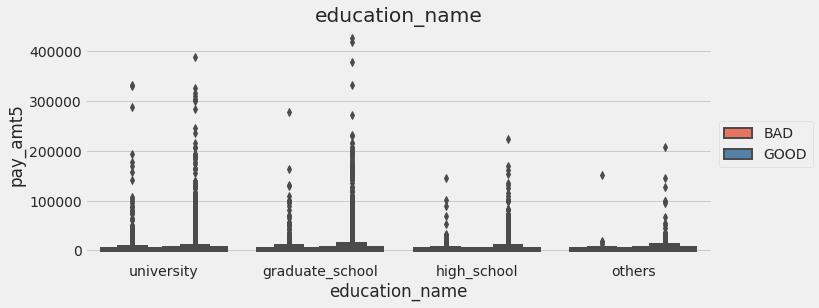

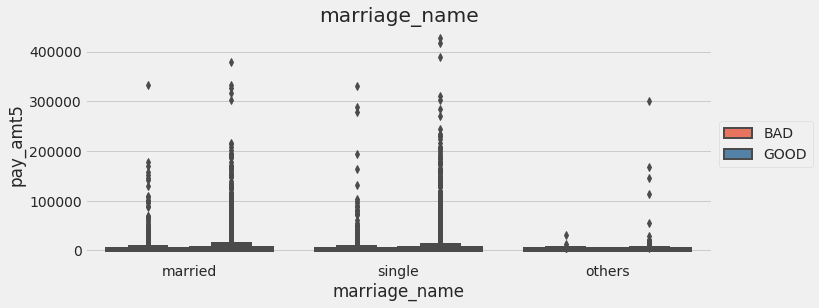

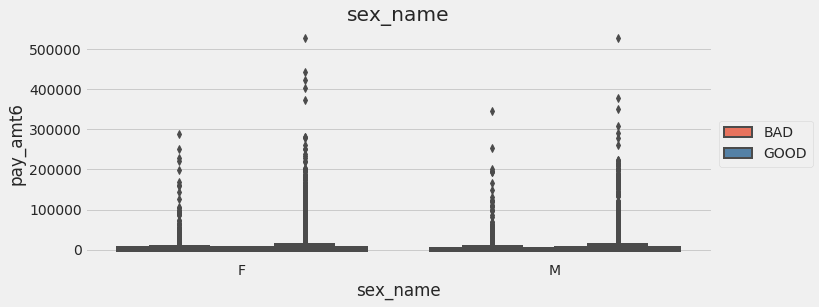

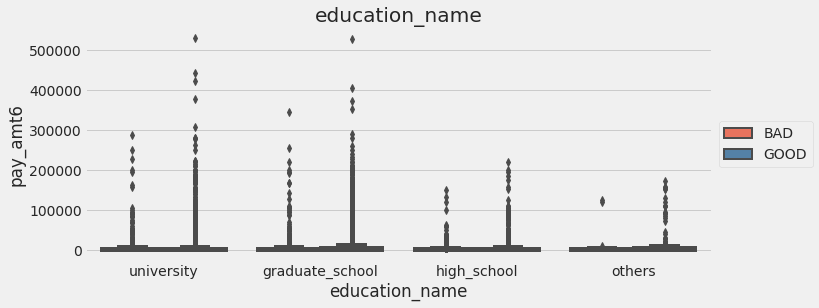

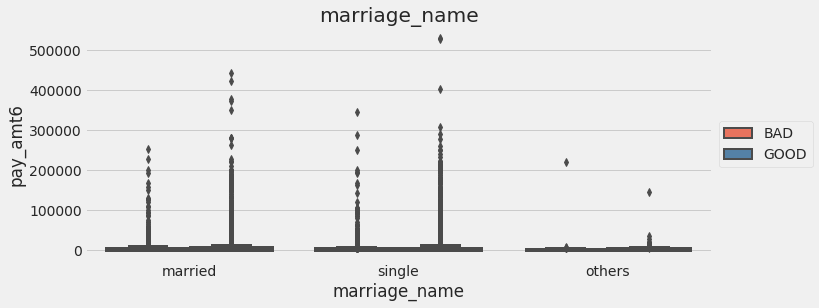

In [22]:
bill_amt_cols = df.filter(regex=r'(bill_amt|pay_amt|limit_bal)').columns.tolist()
color_level = {'GOOD':'steelblue','BAD':'tomato'}
for j in df[bill_amt_cols]:
    for i in df.drop('target',axis = 1).select_dtypes('object'):
        plt.figure(figsize = (10,4))
        sns.boxplot(x = i , y = j,hue = 'target' ,data = df,palette=color_level)
        plt.title(i)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

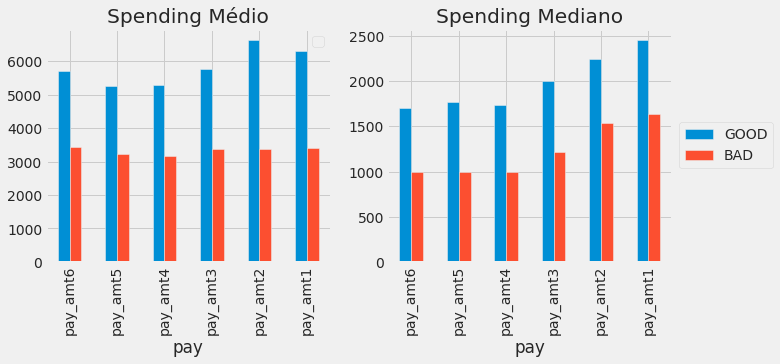

In [53]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

desc_pay = df.filter(regex = 'pay_amt').columns.tolist()

ax[0] = df.\
groupby('target')[desc_pay].mean().T.\
reset_index().\
rename(columns = {'index':'pay'}).\
sort_values('pay',ascending = False).\
plot(x = 'pay' , y =  ['GOOD','BAD'] , kind = 'bar' , ax = ax[0])
ax[0].set_title('Spending Médio')
ax[0].legend('')

ax[1] = df.\
groupby('target')[desc_pay].median().T.\
reset_index().\
rename(columns = {'index':'pay'}).\
sort_values('pay',ascending = False).\
plot(x = 'pay' , y = ['GOOD','BAD'] , kind ='bar' , ax = ax[1])
ax[1].set_title('Spending Mediano')
ax[1]


ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))



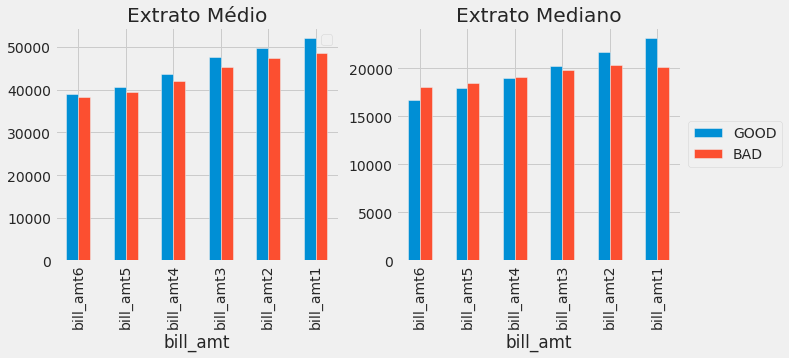

In [52]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

desc_pay = df.filter(regex = 'bill_amt').columns.tolist()

ax[0] = df.\
groupby('target')[desc_pay].mean().T.\
reset_index().\
rename(columns = {'index':'bill_amt'}).\
sort_values('bill_amt',ascending = False).\
plot(x = 'bill_amt' , y =  ['GOOD','BAD'] , kind = 'bar' , ax = ax[0])
ax[0].set_title('Extrato Médio')
ax[0].legend('')

ax[1] = df.\
groupby('target')[desc_pay].median().T.\
reset_index().\
rename(columns = {'index':'bill_amt'}).\
sort_values('bill_amt',ascending = False).\
plot(x = 'bill_amt' , y = ['GOOD','BAD'] , kind ='bar' , ax = ax[1])
ax[1].set_title('Extrato Mediano')
ax[1]

ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))


### Matriz de Correlação

In [24]:
plt.figure(figsize = (10,10))
bill_amt_cols = df.filter(regex=r'(bill_amt|pay_amt|limit_bal)').columns.tolist()
df[bill_amt_cols].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,limit_bal,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
limit_bal,1.00,0.29,0.28,0.28,0.29,0.30,0.29,0.20,0.18,0.21,0.20,0.22,0.22
bill_amt1,0.29,1.00,0.95,0.89,0.86,0.83,0.80,0.14,0.10,0.16,0.16,0.17,0.18
bill_amt2,0.28,0.95,1.00,0.93,0.89,0.86,0.83,0.28,0.10,0.15,0.15,0.16,0.17
bill_amt3,0.28,0.89,0.93,1.00,0.92,0.88,0.85,0.24,0.32,0.13,0.14,0.18,0.18
bill_amt4,0.29,0.86,0.89,0.92,1.00,0.94,0.90,0.23,0.21,0.30,0.13,0.16,0.18
bill_amt5,0.30,0.83,0.86,0.88,0.94,1.00,0.95,0.22,0.18,0.25,0.29,0.14,0.16
bill_amt6,0.29,0.80,0.83,0.85,0.90,0.95,1.00,0.20,0.17,0.23,0.25,0.31,0.12
pay_amt1,0.20,0.14,0.28,0.24,0.23,0.22,0.20,1.00,0.29,0.25,0.20,0.15,0.19
pay_amt2,0.18,0.10,0.10,0.32,0.21,0.18,0.17,0.29,1.00,0.24,0.18,0.18,0.16
pay_amt3,0.21,0.16,0.15,0.13,0.30,0.25,0.23,0.25,0.24,1.00,0.22,0.16,0.16


<Figure size 720x720 with 0 Axes>

### Distribuição e KS das variáveis continuas

In [25]:
def plot_density_ks(feature):
    plt.style.use('fivethirtyeight')
    x_good = np.sort(df[df['target'] == 'GOOD'][feature])
    x_good = x_good[~np.isnan(x_good)]


    x_bad  = np.sort(df[df['target'] == 'BAD'][feature])
    x_bad = x_bad[~np.isnan(x_bad)]


    y_good= np.arange(1,len(x_good)+1)/len(x_good)
    y_bad = np.arange(1,len(x_bad)+1)/len(x_bad)

    # Calculating KS:
    from scipy import stats
    ks = stats.ks_2samp(x_good,x_bad).statistic


    plt.figure(figsize = (12,6))

    #Plot Density by target
    plt.subplot(1,2,1)
    sns.distplot(x_good , color = 'steelblue' , hist = False )
    sns.distplot(x_bad  , color = 'tomato'  , hist = False ) 
    plot_title1 = 'Density ' + feature + ' by target'
    plt.title(plot_title1)
    plt.legend(['good','bad'])


#     red_patch = mpatches.Patch(color='red', label='GOOD')
#     blue_patch = mpatches.Patch(color='blue', label='BAD')
#     plt.legend(handles=[red_patch, blue_patch])



    #Ploting KS curve by target
    plt.subplot(1,2,2)
    plt.plot(x_good,y_good , color = 'steelblue' , label = "GOOD")
    plt.plot(x_bad ,y_bad  , color = 'tomato'  , label = 'BAD')
    plot_title2 = 'KS: ' + str(round(ks,2))
    plt.title(plot_title2)
    plt.legend(['good','bad'])



    plt.tight_layout()
    plt.show()

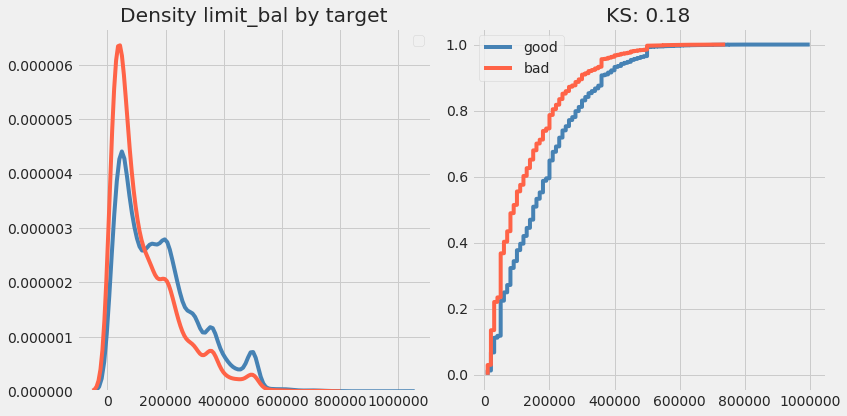

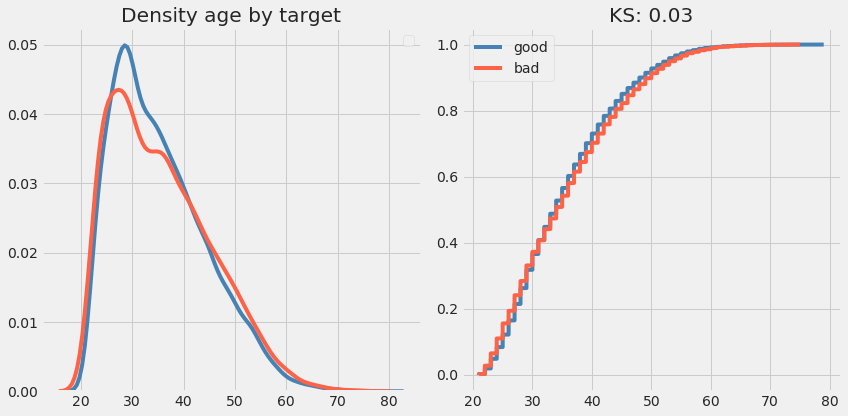

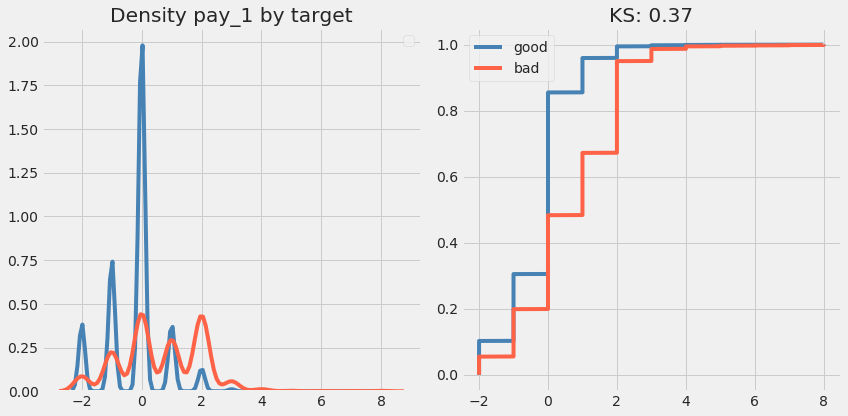

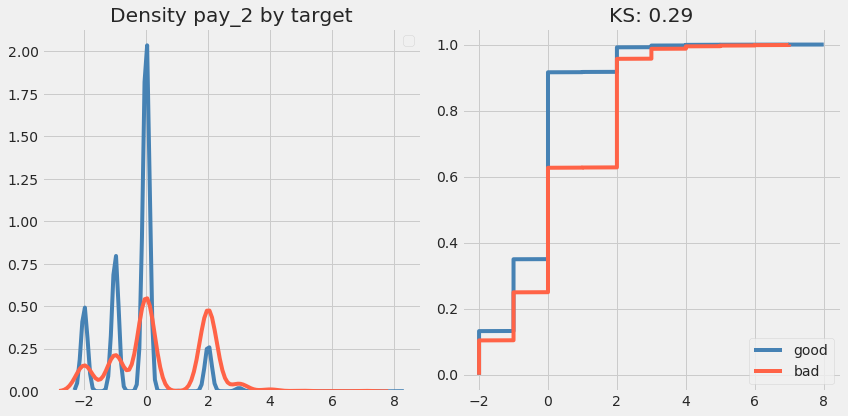

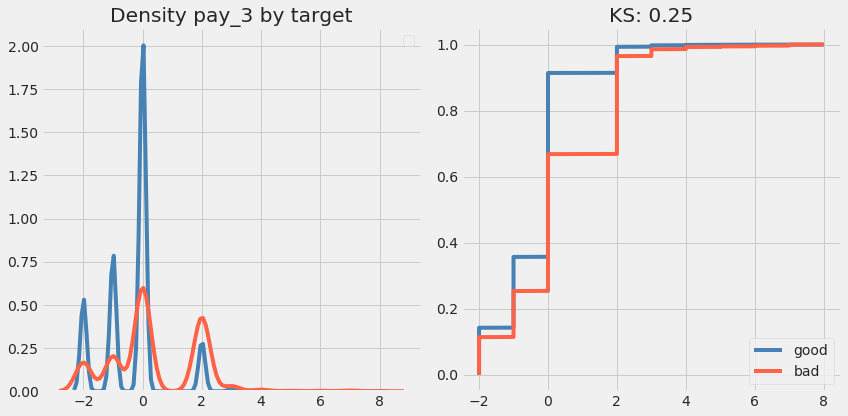

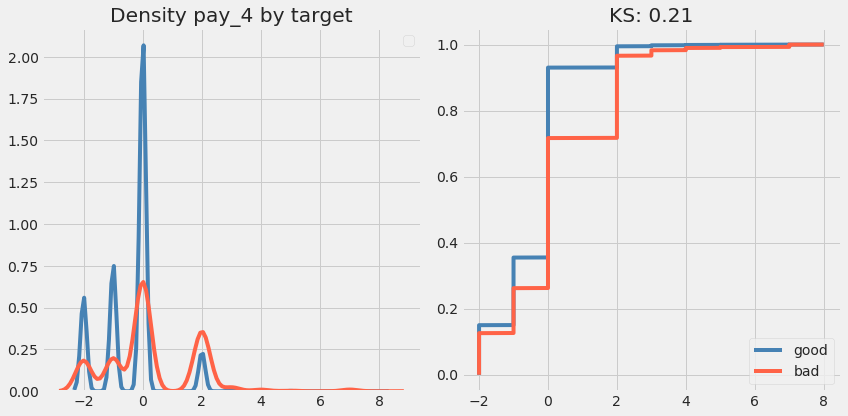

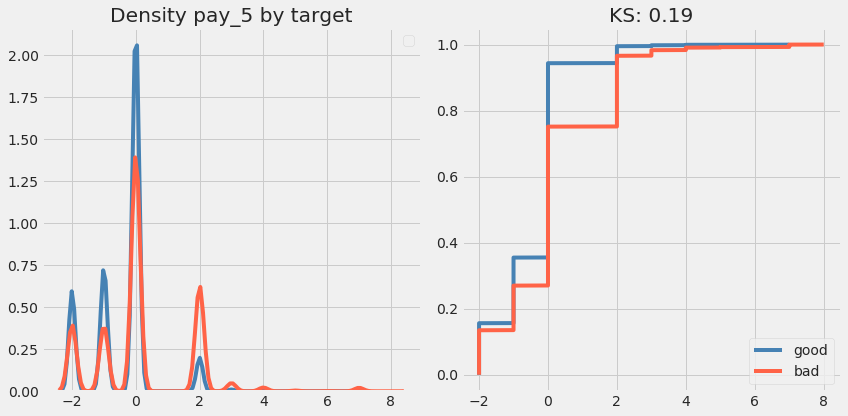

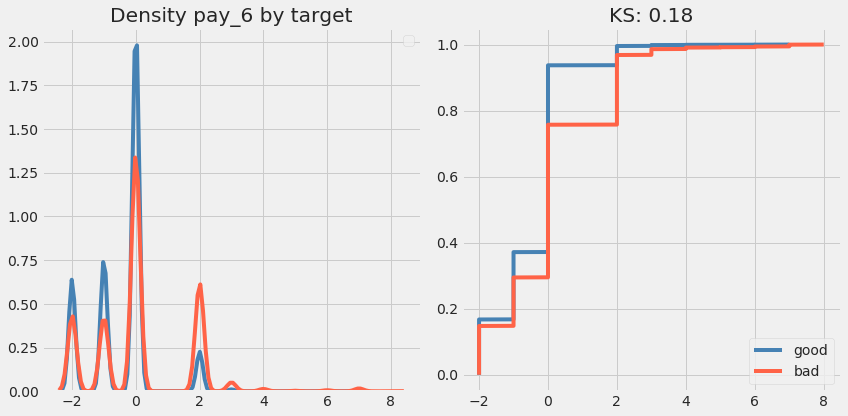

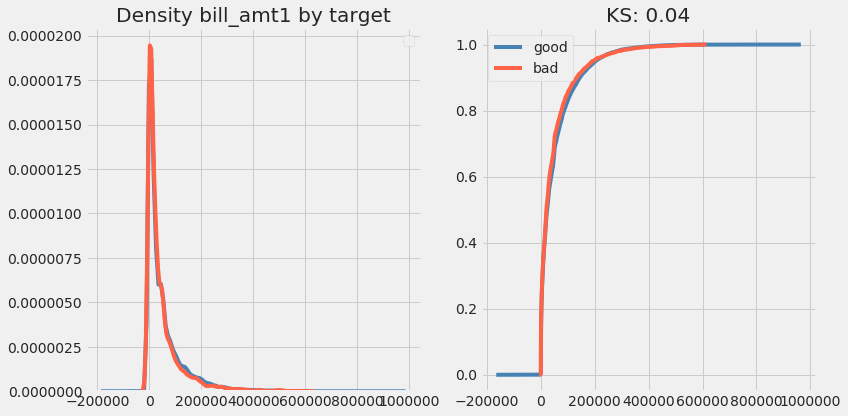

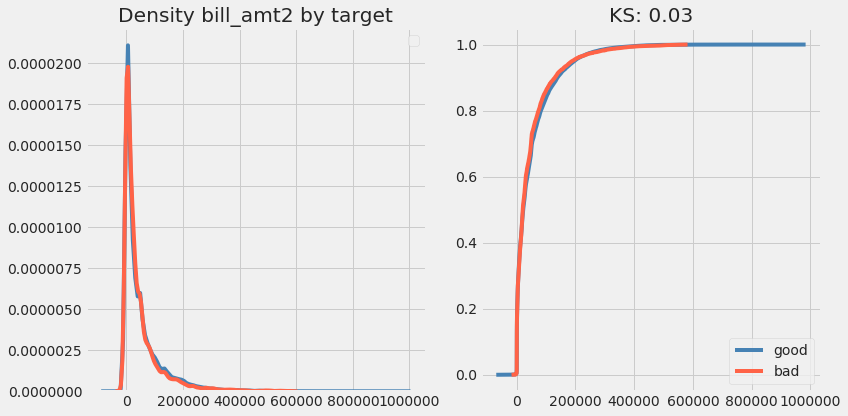

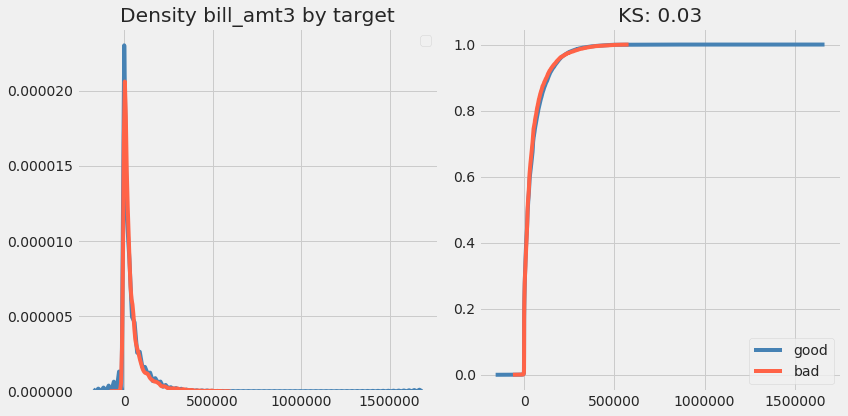

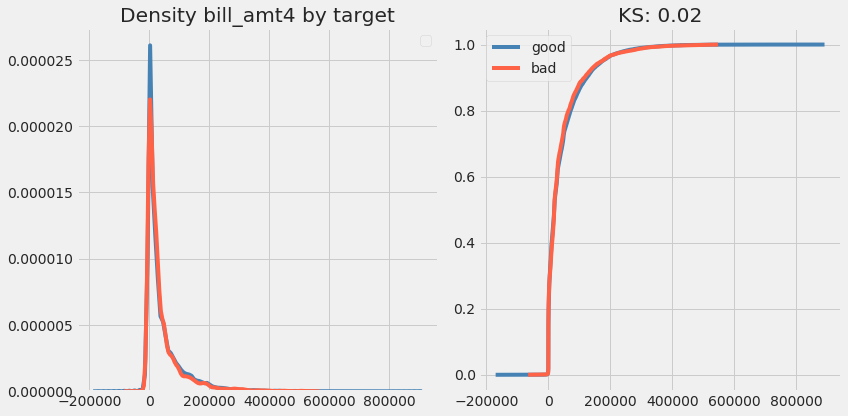

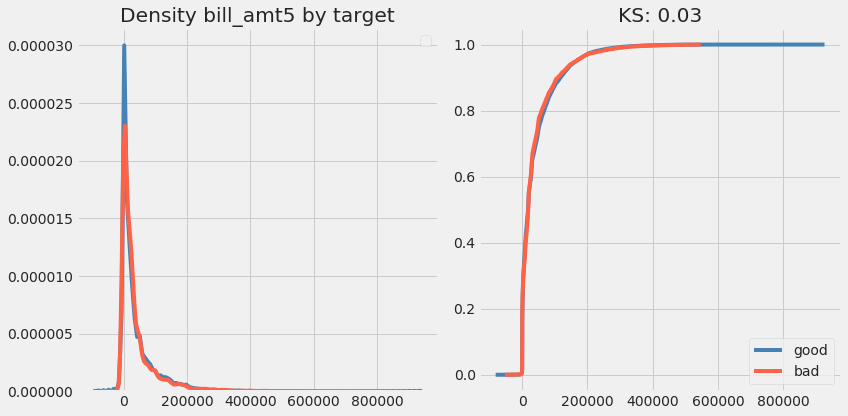

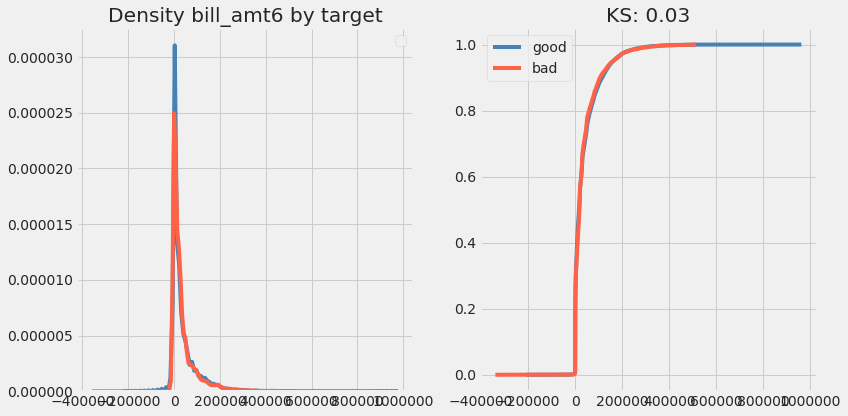

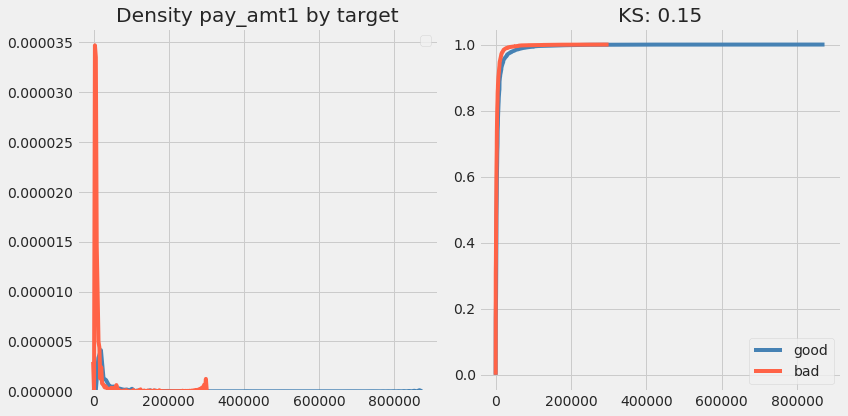

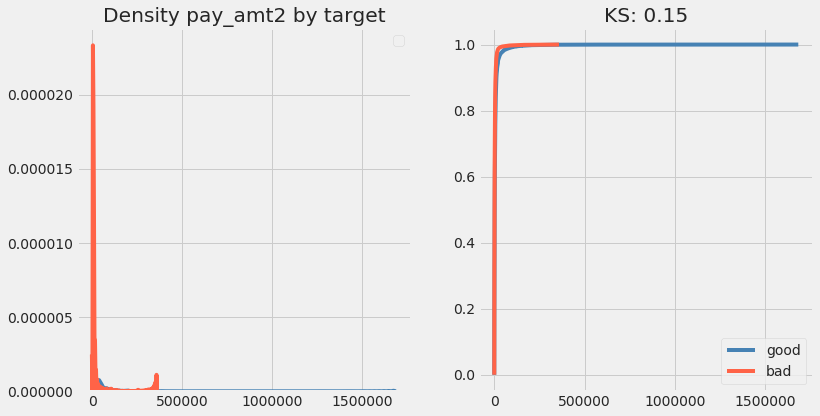

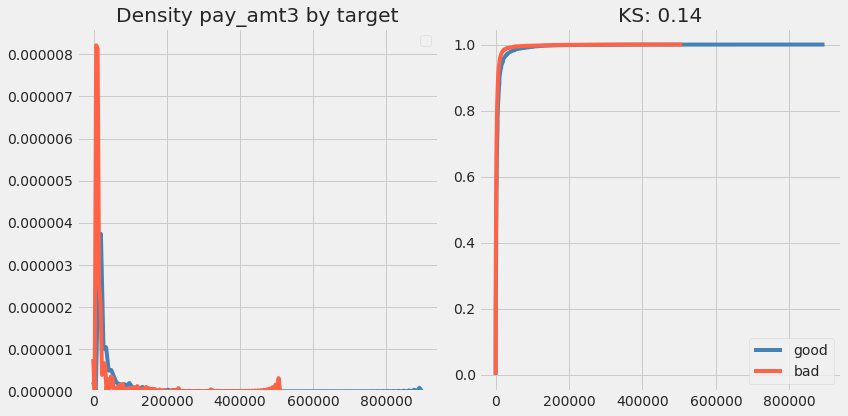

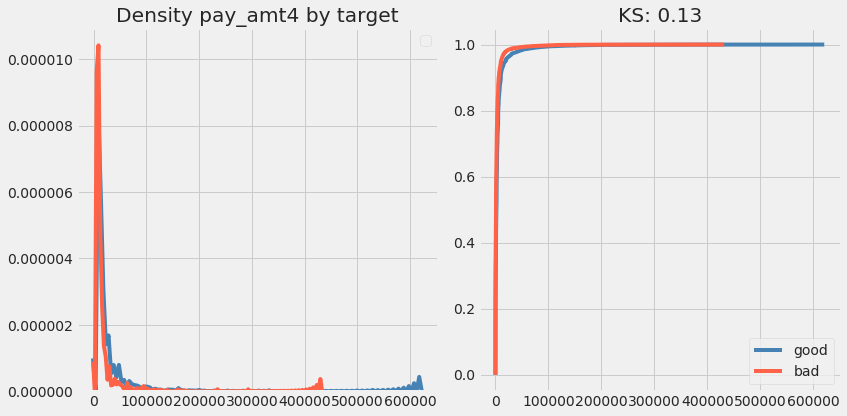

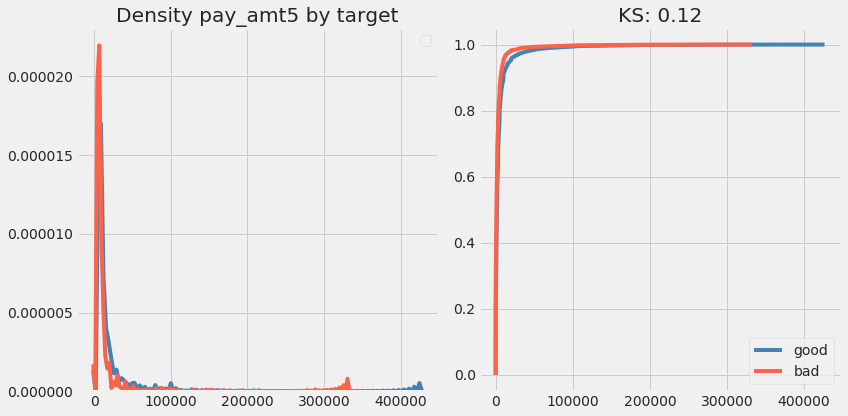

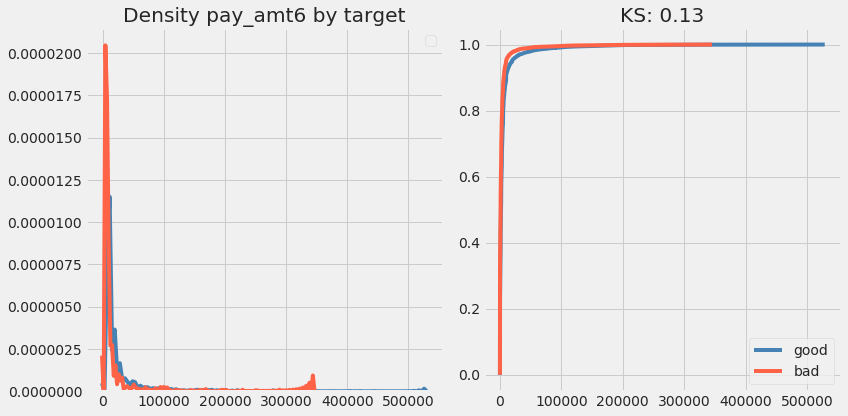

In [26]:
for i in df.drop('num_target',axis = 1).select_dtypes(['int64','float64']).columns:
    plot_density_ks(i)

In [27]:
df.columns

Index(['limit_bal', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'num_target', 'sex_name',
       'education_name', 'marriage_name', 'target'],
      dtype='object')

### Gerando algumas Features

In [28]:
### Criando coluna com indice de utilizaçao do limite,por fatura
for i in range(1,7):
    df['indice_utilizacao'+str(i)]= df['bill_amt'+str(i)] / df['limit_bal']

In [46]:
### Criando coluna com indice de utilizaçao do limite,por fatura
for i in range(1,7):
    df['pct_pago'+str(i)]= (df['pay_amt'+str(i)] / df['bill_amt'+str(i)]).replace([np.inf, -np.inf], np.nan).fillna(0);    

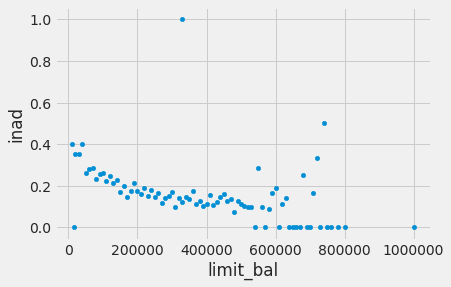

In [30]:
df.groupby('limit_bal')['num_target'].mean().to_frame('inad').reset_index().plot(x = 'limit_bal',y='inad',kind = 'scatter')

### Cria Grupo para Limite Aprovado

In [31]:
def temp(x):
    x = x/1000;
    if x < 50:
        return 'd';
    elif x < 140:
        return 'c';
    elif x < 200:
        return 'b';
    else:
        return 'a';
    
df['prox_renda'] = df['limit_bal'].apply(temp)

### Cria variável Casado (sim = 1, 0 = nao)

In [32]:
df['married'] = df['marriage_name'].apply(lambda x: 1 if x == 'married' else 0 )

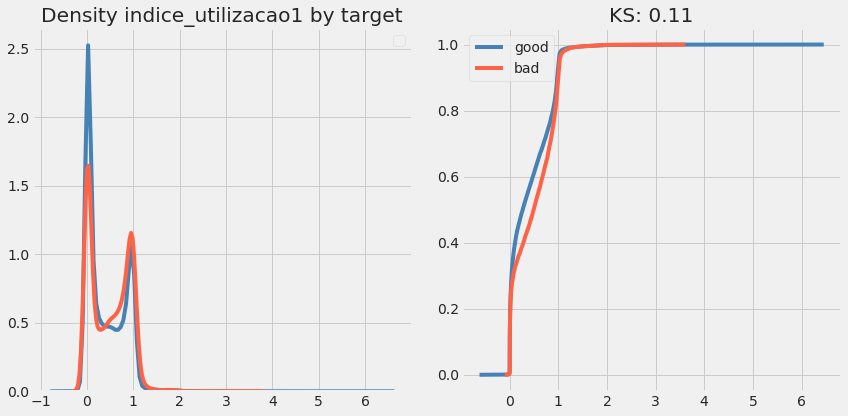

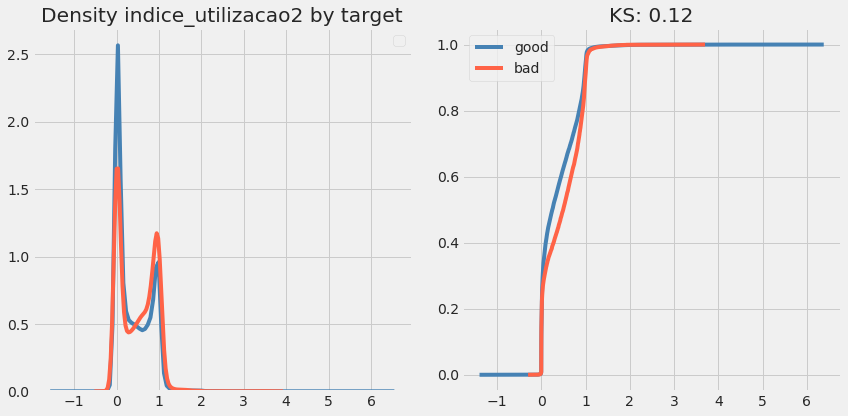

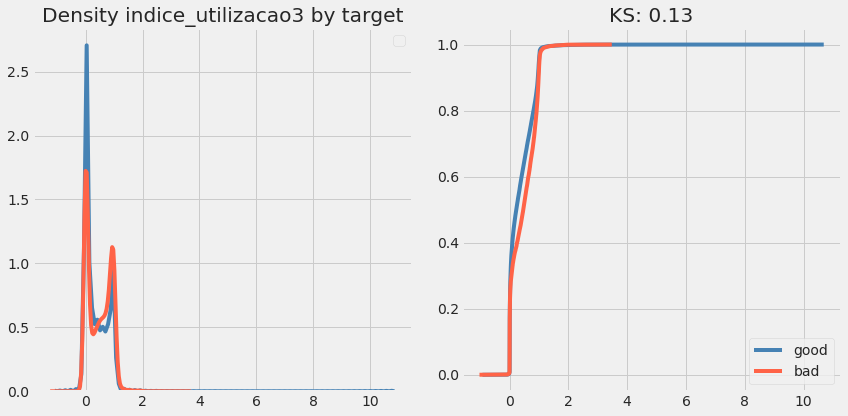

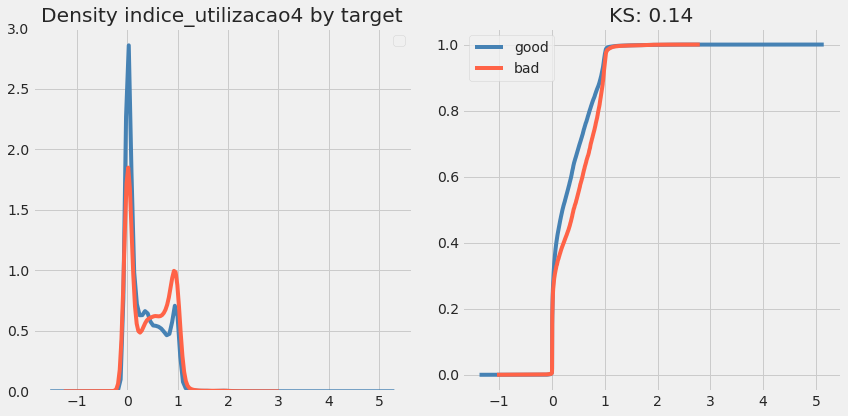

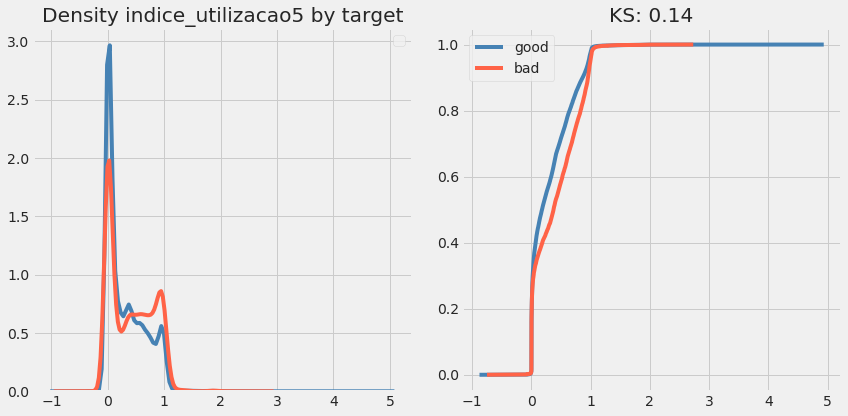

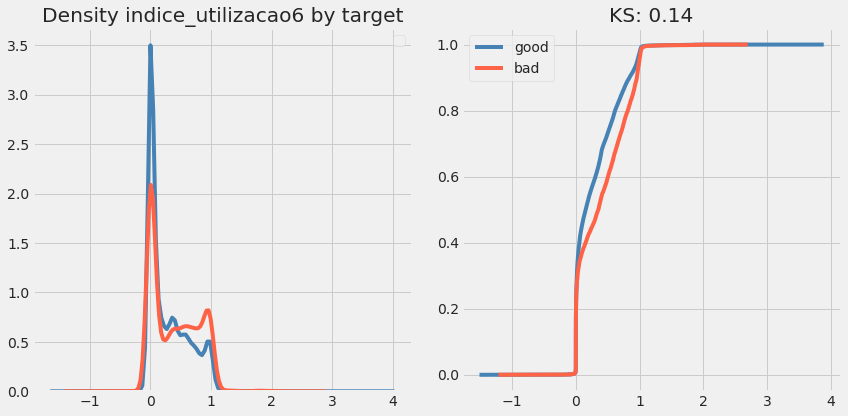

In [33]:
for i in df.filter(regex = 'indice').columns:
    plot_density_ks(i)

### Criando coluna com Idade - Media(idade)

In [34]:
df['idade_std'] =( df['age']-df['age'].mean())/df['age'].mean()

### Flag Para indicar se estado civil é casado ou não

In [35]:
df['married'] = df['marriage_name'].apply(lambda x: 1 if x == 'married' else 0 )

### Podemos também tentar criar uma variável que associe o nivel de escolaridade com o tempo de estudo

In [36]:
df['education_years'] = df['education_name'].map({'graduate_school':5,
                                                  'university':15,
                                                  'high_school':9,
                                                  'others':0})

In [37]:
df['pagou_ultima_fatura'] = df['pay_1'].apply(lambda x: 1 if x > 0 else 0 )

### Ajustando Alguns modelos

In [38]:
from sklearn.model_selection import train_test_split
X = df.drop(['num_target','target'],axis = 1)
y = df['num_target']

In [39]:
def create_decil(modelo,testX):
    
    
    validation = pd.DataFrame()
    validation['prob'] = modelo.predict(testX)
    validation['score'] = np.ceil(validation['prob'].rank(pct=True)*10)
    validation['target'] = y_test
    
    
    temp = validation.groupby('score').apply(model_stats).round(3);
    temp['per_event'] = temp['event'] / temp['event'].sum();
    temp['non_per_event'] = temp['non_event'] / temp['non_event'].sum();
    temp['lift'] = temp['target'] / ( temp['event'].sum()/ temp['count'].sum() )
    display(temp.round(3))

    
    plt.figure(figsize=(10,5))
    plt.subplot(121);
    temp.plot.scatter(x='prob',y='target',ax=plt.gca());
    plt.subplot(122);
    plt.title('KS %0.2f'% np.abs( temp['per_event'].cumsum() -temp['non_per_event'].cumsum()).max())
    temp.reset_index().plot.bar(x='prob',y=['per_event','non_per_event'],ax=plt.gca());
    
    
    
def model_stats(validation):
    s = pd.Series({
        'prob':validation['prob'].mean(),
        'target':validation['target'].mean(),
        'count':len(validation),
        'event':validation['target'].sum(),
        'non_event': len(validation) - validation['target'].sum()
    });
    return s
    

### Selecionando colunas para testar no modelo

In [40]:
from sklearn.model_selection import train_test_split
X = df.drop(['num_target','target'],axis = 1)
y = df['num_target']




vars = [
          'idade_std',
          'indice_utilizacao1',
#          'indice_utilizacao2',
#         'indice_utilizacao3',
#        'indice_utilizacao4',
#         'indice_utilizacao5',
#         'indice_utilizacao6',
          'married',
#          'pct_pago1',
#         'pct_pago2',
#         'pct_pago3',
#         'pct_pago4',
#         'pct_pago5',
#         'pct_pago6',
          'prox_renda',
#         'education_name',
          'education_years',
#          'sex_name' 
#          'pay_1'
#           'pagou_ultima_fatura',
#          'bill_amt1'
        ]

### Separando em base de treino e teste

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=2) 

### Ajustando o modelo de regressão Logistica com Stats Models

In [42]:
import statsmodels.api as sm
from statsmodels.formula.api import logit
modelo_logistico = logit('num_target ~ ' + (' + '.join(vars)),pd.concat([X_train,y_train],axis= 1)).fit()
modelo_logistico.summary()

Optimization terminated successfully.
         Current function value: 0.512269
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             num_target   No. Observations:                21000
Model:                          Logit   Df Residuals:                    20992
Method:                           MLE   Df Model:                            7
Date:                Mon, 30 Mar 2020   Pseudo R-squ.:                 0.03022
Time:                        21:42:36   Log-Likelihood:                -10758.
converged:                       True   LL-Null:                       -11093.
Covariance Type:            nonrobust   LLR p-value:                1.649e-140
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.9808      0.050    -39.295      0.000      -2.080      -1.882
prox_renda[T.b]        0.2646      0.056      4.690      0.000       0.154       0.375
prox_renda[T.c]        0.6355      0.045     14.194      0.000       0.548       0.723
prox_renda[T.d]        1.0976      0.054     20.409      0.000       0.992       1.203
idade_std              0.1028      0.071      1.444      0.149      -0.037       0.242
indice_utilizacao1     0.1391      0.044      3.156      0.002       0.053       0.225
married                0.2037      0.038      5.316      0.000       0.129       0.279
education_years        0.0105      0.004      2.785      0.005       0.003       0.018
======================================================================================
"""

In [43]:
np.exp(modelo_logistico.params).to_frame('ODDS').reset_index()

,index,ODDS
0,Intercept,0.137961
1,prox_renda[T.b],1.302951
2,prox_renda[T.c],1.887943
3,prox_renda[T.d],2.997103
4,idade_std,1.108236
5,indice_utilizacao1,1.149206
6,married,1.225972
7,education_years,1.010564


,prob,target,count,event,non_event,per_event,non_per_event,lift
score,,,,,,,,
1.0,0.128,0.128,900.0,115.0,785.0,0.058,0.112,0.578
2.0,0.144,0.143,900.0,129.0,771.0,0.065,0.110,0.645
3.0,0.158,0.163,900.0,147.0,753.0,0.074,0.107,0.736
4.0,0.170,0.168,900.0,151.0,749.0,0.076,0.107,0.758
5.0,0.195,0.197,900.0,177.0,723.0,0.089,0.103,0.889
6.0,0.225,0.232,900.0,209.0,691.0,0.105,0.099,1.047
7.0,0.247,0.240,900.0,216.0,684.0,0.108,0.098,1.083
8.0,0.275,0.243,900.0,219.0,681.0,0.110,0.097,1.097
9.0,0.308,0.301,900.0,271.0,629.0,0.136,0.090,1.359


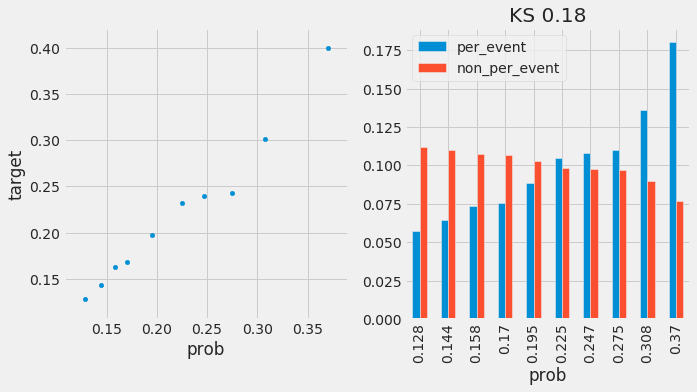

In [44]:
create_decil(modelo_logistico,X_test)